## Machine Learning Lab Practical 3 (09/08/2024)

ชื่อ นายฉัตรดนัย ปูทอง

รหัสนักศึกษา 116510462029-9

e-mail  earthtyjoy11@gmail.com

# 1. พื้นฐานการพัฒนาโมเดล Linear Regression




1.1 import library ที่เกี่ยวข้อง

In [ ]:
import numpy as np
import math, copy

1.2 ตัวอย่าง Method การทำนายค่า ด้วยโมเดล Linear Regression

In [ ]:
def linearRegressionPredictor(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

1.3 ตัวอย่างการเรียกใช้ method linearRegressionPredictor

In [ ]:
w = 2
b = 10
input_x = np.array([1.0, 2.0])

y_hat = linearRegressionPredictor (input_x, w, b)
print (f"input_x = {input_x}")
print (f"parameter w = {w}, b = {b}")
print (f"y_hat = {y_hat}")

input_x = [1. 2.]
parameter w = 2, b = 10
y_hat = [12. 14.]


1.4 ตัวอย่างการคำนวณ cost function สำหรับ Linear Regression

In [ ]:
def cost_function (x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

1.5 ตัวอย่างการเรียกใข้งาน cost function

In [ ]:
x_train = np.array([10, 20, 30, 40])
y_train = np.array([28, 52, 74, 88])

w = 2
b = 10

cost = cost_function (x_train, y_train, w, b)
print (f"cost = {cost}")


cost = 3.5


1.6 การคำนวณค่า Gradient สำหรับ Linear Regression

In [ ]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

1.7 ตัวอย่างการเรียกใช้งาน method compute_gradient

In [ ]:
x_train = np.array([10, 20, 30, 40])
y_train = np.array([28, 52, 74, 88])

w = 2
b = 10
gradient = compute_gradient (x_train, y_train, w, b)
print (f"gradient = {gradient}")


gradient = (-15.0, -0.5)


1.8 Gradient Descent algorithm

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """

    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)

        # Update Parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

1.9 ตัวอย่างการทำงานของ Gradient Descent Algorithm

In [ ]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.41e+00  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost 7.93e-01  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost 4.28e-02  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.95e-03  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.37e-04  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02


# 2. การพัฒนาโมเดล Linear Regression ด้วย Scikit-learn

2.1 กำหนดข้อมูลฝึกสอน (X_train) แสดงอายุของรถยนต์ และ (y_train) แสดงความเร็วของรถยต์แต่ละคัน ดังนี้

In [ ]:
X_train = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y_train = [99,86,87,88,111,86,103,87,94,78,77,85,86]


2.2 ตัวอย่างการวิเคราะห์เชิงสถิติของข้อมูล และแสดงผลข้อมูล

slope = -1.7512877115526118, intercept = 103.10596026490066
r = -0.758591524376155, p = 0.0026468739224561064
std_err = 0.453536157607742


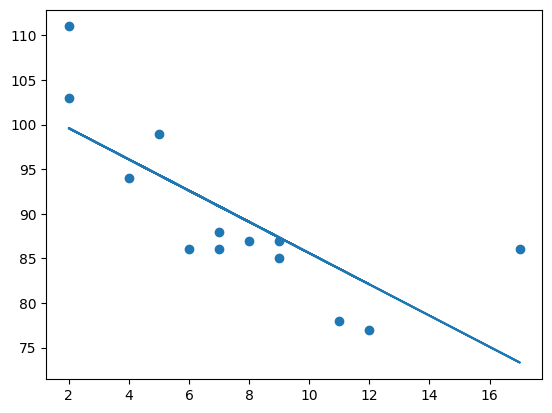

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

print(f"slope = {slope}, intercept = {intercept}")
print(f"r = {r}, p = {p}")
print(f"std_err = {std_err}")

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, X_train))

plt.scatter(X_train, y_train)
plt.plot(X_train, mymodel)
plt.show()

2.3 พื้นฐานการใช้งาน Scikit-learn ในการสร้างโมเดล Linear Regression  [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train)

# training model
model = LinearRegression().fit(X_train, y_train)

# model attributes
score = model.score(X_train, y_train)
w = model.coef_
b = model.intercept_
print(f"score = {score}, w = {w}, b = {b}")

# prediction
x_test = np.array([2]).reshape(-1, 1)
y_hat = model.predict(x_test)
print(f"x_test = {x_test}, y_hat = {y_hat}")


score = 0.5754611008553381, w = [-1.75128771], b = 103.10596026490066
x_test = [[2]], y_hat = [99.60338484]


2.4 **แบบฝึกหัด** ให้สร้างโมเดล Linear Regression เมื่อกำหนดให้ข้อมูลฝึกสอน 𝓣= {[x1 x2], y} = {([0 1], 6), ([1 2], 8), ([2 2], 9),([2 3], 11)} และทำนายผลเมื่อกำหนดให้ X_test = [3, 5]


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# training dataset
X_train = np.array([[0, 1], [1, 2], [2, 2], [2, 3]])

# target output
y_train = np.array([6, 8, 9, 11])

# ให้ นศ. เติม code ที่เหลือ
model = LinearRegression().fit(X_train, y_train)
score = model.score(X_train, y_train)
w = model.coef_
b = model.intercept_
print(f"score = {score}, w = {w}, b = {b}")

x_test = np.array([[3, 5]])
y_hat = model.predict(x_test)
print(f"x_test = {x_test}, y_hat = {y_hat}")


score = 0.9871794871794872, w = [0.66666667 1.83333333], b = 3.9999999999999982
x_test = [[3 5]], y_hat = [15.16666667]
